In [1]:
import pandas as pd


In [2]:
files = [f"2024-0{x}_HRTravelTimes.csv" for x in range(1,5)]
files

['2024-01_HRTravelTimes.csv',
 '2024-02_HRTravelTimes.csv',
 '2024-03_HRTravelTimes.csv',
 '2024-04_HRTravelTimes.csv']

In [3]:
dfs = []
for file in files:
    dfs.append(pd.read_csv(file))

/Users/ncantalupa/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3308: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df = pd.concat(dfs, axis=0)

In [5]:
df

,service_date,route_id,trip_id,direction_id,direction,from_parent_station,from_stop_id,from_stop_name,to_parent_station,to_stop_id,to_stop_name,from_stop_departure_datetime,from_stop_departure_sec,to_stop_arrival_datetime,to_stop_arrival_sec,travel_time_sec
0,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-rbmnl,70057,Revere Beach,2024-01-02T00:13:20Z,87200,2024-01-02T00:13:56Z,87236,36
1,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-bmmnl,70055,Beachmont,2024-01-02T00:13:20Z,87200,2024-01-02T00:15:57Z,87357,157
2,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-sdmnl,70053,Suffolk Downs,2024-01-02T00:13:20Z,87200,2024-01-02T00:17:34Z,87454,254
3,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-orhte,70051,Orient Heights,2024-01-02T00:13:20Z,87200,2024-01-02T00:19:19Z,87559,359
4,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-wimnl,70049,Wood Island,2024-01-02T00:13:20Z,87200,2024-01-02T00:22:11Z,87731,531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763013,2024-04-30,Red,ADDED-1581874981,1,North,place-harsq,70068,Harvard,place-davis,70064,Davis,2024-05-01T00:09:31Z,86971,2024-05-01T00:13:35Z,87215,244
2763014,2024-04-30,Red,ADDED-1581874981,1,North,place-harsq,70068,Harvard,place-alfcl,70061,Alewife,2024-05-01T00:09:31Z,86971,2024-05-01T00:17:03Z,87423,452
2763015,2024-04-30,Red,ADDED-1581874981,1,North,place-portr,70066,Porter,place-davis,70064,Davis,2024-05-01T00:11:39Z,87099,2024-05-01T00:13:35Z,87215,116
2763016,2024-04-30,Red,ADDED-1581874981,1,North,place-portr,70066,Porter,place-alfcl,70061,Alewife,2024-05-01T00:11:39Z,87099,2024-05-01T00:17:03Z,87423,324


In [324]:
stop_names = {}
unique_stops = df[['from_stop_id', 'from_stop_name', 'to_stop_id', 'to_stop_name', 'route_id']].drop_duplicates()
def update_stop_names(row):
    from_stop_id = str(row['from_stop_id'])
    to_stop_id = str(row['to_stop_id'])
    if from_stop_id not in stop_names:
        stop_names[from_stop_id] = f"{str(row['from_stop_name'])} - {str(row['route_id'])}"
    if to_stop_id not in stop_names:
        stop_names[to_stop_id] = f"{str(row['to_stop_name'])} - {str(row['route_id'])}"
unique_stops.apply(update_stop_names, axis=1)

0          None
1          None
2          None
3          None
4          None
           ... 
1861102    None
1861105    None
1861107    None
1861382    None
2456187    None
Length: 2595, dtype: object

In [325]:
stop_names["70001"]

'Forest Hills - Orange'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11117840 entries, 0 to 2763017
Data columns (total 16 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   service_date                  object
 1   route_id                      object
 2   trip_id                       object
 3   direction_id                  int64 
 4   direction                     object
 5   from_parent_station           object
 6   from_stop_id                  object
 7   from_stop_name                object
 8   to_parent_station             object
 9   to_stop_id                    object
 10  to_stop_name                  object
 11  from_stop_departure_datetime  object
 12  from_stop_departure_sec       int64 
 13  to_stop_arrival_datetime      object
 14  to_stop_arrival_sec           int64 
 15  travel_time_sec               int64 
dtypes: int64(4), object(12)
memory usage: 1.4+ GB


In [7]:
df['datetime'] = pd.to_datetime(df["from_stop_departure_datetime"], format="%Y-%m-%dT%H:%M:%SZ")

In [8]:
df["datetime_floor"] = df['datetime'].dt.floor("H")

In [9]:
df["datetime_merge"] = df["datetime_floor"].dt.strftime("%Y-%m-%d %H:%M:%S")

In [10]:
df

,service_date,route_id,trip_id,direction_id,direction,from_parent_station,from_stop_id,from_stop_name,to_parent_station,to_stop_id,to_stop_name,from_stop_departure_datetime,from_stop_departure_sec,to_stop_arrival_datetime,to_stop_arrival_sec,travel_time_sec,datetime,datetime_floor,datetime_merge
0,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-rbmnl,70057,Revere Beach,2024-01-02T00:13:20Z,87200,2024-01-02T00:13:56Z,87236,36,2024-01-02 00:13:20,2024-01-02,2024-01-02 00:00:00
1,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-bmmnl,70055,Beachmont,2024-01-02T00:13:20Z,87200,2024-01-02T00:15:57Z,87357,157,2024-01-02 00:13:20,2024-01-02,2024-01-02 00:00:00
2,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-sdmnl,70053,Suffolk Downs,2024-01-02T00:13:20Z,87200,2024-01-02T00:17:34Z,87454,254,2024-01-02 00:13:20,2024-01-02,2024-01-02 00:00:00
3,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-orhte,70051,Orient Heights,2024-01-02T00:13:20Z,87200,2024-01-02T00:19:19Z,87559,359,2024-01-02 00:13:20,2024-01-02,2024-01-02 00:00:00
4,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-wimnl,70049,Wood Island,2024-01-02T00:13:20Z,87200,2024-01-02T00:22:11Z,87731,531,2024-01-02 00:13:20,2024-01-02,2024-01-02 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763013,2024-04-30,Red,ADDED-1581874981,1,North,place-harsq,70068,Harvard,place-davis,70064,Davis,2024-05-01T00:09:31Z,86971,2024-05-01T00:13:35Z,87215,244,2024-05-01 00:09:31,2024-05-01,2024-05-01 00:00:00
2763014,2024-04-30,Red,ADDED-1581874981,1,North,place-harsq,70068,Harvard,place-alfcl,70061,Alewife,2024-05-01T00:09:31Z,86971,2024-05-01T00:17:03Z,87423,452,2024-05-01 00:09:31,2024-05-01,2024-05-01 00:00:00
2763015,2024-04-30,Red,ADDED-1581874981,1,North,place-portr,70066,Porter,place-davis,70064,Davis,2024-05-01T00:11:39Z,87099,2024-05-01T00:13:35Z,87215,116,2024-05-01 00:11:39,2024-05-01,2024-05-01 00:00:00
2763016,2024-04-30,Red,ADDED-1581874981,1,North,place-portr,70066,Porter,place-alfcl,70061,Alewife,2024-05-01T00:11:39Z,87099,2024-05-01T00:17:03Z,87423,324,2024-05-01 00:11:39,2024-05-01,2024-05-01 00:00:00


In [11]:
weather_df = pd.read_csv("boston_weather_010124-060424.csv")
weather_df

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"Boston,United States",2024-01-01T00:00:00,33.2,30.3,23.0,65.75,0.0,0,NaN,0.0,...,1014.8,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
1,"Boston,United States",2024-01-01T01:00:00,33.2,26.3,23.0,65.87,0.0,0,NaN,0.0,...,1014.8,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
2,"Boston,United States",2024-01-01T02:00:00,33.2,27.0,23.0,65.87,0.0,0,NaN,0.0,...,1015.2,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
3,"Boston,United States",2024-01-01T03:00:00,33.2,26.3,23.0,65.86,0.0,0,NaN,0.0,...,1015.2,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
4,"Boston,United States",2024-01-01T04:00:00,33.1,28.8,23.0,66.01,0.0,0,NaN,0.0,...,1015.1,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,"Boston,United States",2024-06-04T19:00:00,65.2,65.2,57.9,77.14,0.0,0,NaN,0.0,...,1015.4,85.9,9.9,104,0.4,1,10,Partially cloudy,partly-cloudy-day,"KOWD,KBED,0518W,KBOS"
3739,"Boston,United States",2024-06-04T20:00:00,64.2,64.2,57.8,79.69,0.0,0,NaN,0.0,...,1015.2,85.9,9.9,12,0.0,0,10,Partially cloudy,partly-cloudy-day,"KOWD,KBED,0518W,KBOS"
3740,"Boston,United States",2024-06-04T21:00:00,64.2,64.2,58.8,82.80,0.0,0,NaN,0.0,...,1015.3,85.9,9.9,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"KOWD,KBED,0518W,KBOS"
3741,"Boston,United States",2024-06-04T22:00:00,65.0,65.0,54.1,67.85,0.0,0,NaN,0.0,...,1015.9,48.8,9.9,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"KOWD,KBED,0518W,KBOS"


In [12]:
weather_df["datetime"] = pd.to_datetime(weather_df["datetime"])
weather_df

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"Boston,United States",2024-01-01 00:00:00,33.2,30.3,23.0,65.75,0.0,0,NaN,0.0,...,1014.8,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
1,"Boston,United States",2024-01-01 01:00:00,33.2,26.3,23.0,65.87,0.0,0,NaN,0.0,...,1014.8,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
2,"Boston,United States",2024-01-01 02:00:00,33.2,27.0,23.0,65.87,0.0,0,NaN,0.0,...,1015.2,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
3,"Boston,United States",2024-01-01 03:00:00,33.2,26.3,23.0,65.86,0.0,0,NaN,0.0,...,1015.2,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
4,"Boston,United States",2024-01-01 04:00:00,33.1,28.8,23.0,66.01,0.0,0,NaN,0.0,...,1015.1,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,"Boston,United States",2024-06-04 19:00:00,65.2,65.2,57.9,77.14,0.0,0,NaN,0.0,...,1015.4,85.9,9.9,104,0.4,1,10,Partially cloudy,partly-cloudy-day,"KOWD,KBED,0518W,KBOS"
3739,"Boston,United States",2024-06-04 20:00:00,64.2,64.2,57.8,79.69,0.0,0,NaN,0.0,...,1015.2,85.9,9.9,12,0.0,0,10,Partially cloudy,partly-cloudy-day,"KOWD,KBED,0518W,KBOS"
3740,"Boston,United States",2024-06-04 21:00:00,64.2,64.2,58.8,82.80,0.0,0,NaN,0.0,...,1015.3,85.9,9.9,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"KOWD,KBED,0518W,KBOS"
3741,"Boston,United States",2024-06-04 22:00:00,65.0,65.0,54.1,67.85,0.0,0,NaN,0.0,...,1015.9,48.8,9.9,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"KOWD,KBED,0518W,KBOS"


In [13]:
weather_df["datetime_merge"] = weather_df["datetime"].dt.strftime("%Y-%m-%d %H:%M:%S")
weather_df

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations,datetime_merge
0,"Boston,United States",2024-01-01 00:00:00,33.2,30.3,23.0,65.75,0.0,0,NaN,0.0,...,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7...",2024-01-01 00:00:00
1,"Boston,United States",2024-01-01 01:00:00,33.2,26.3,23.0,65.87,0.0,0,NaN,0.0,...,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7...",2024-01-01 01:00:00
2,"Boston,United States",2024-01-01 02:00:00,33.2,27.0,23.0,65.87,0.0,0,NaN,0.0,...,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7...",2024-01-01 02:00:00
3,"Boston,United States",2024-01-01 03:00:00,33.2,26.3,23.0,65.86,0.0,0,NaN,0.0,...,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7...",2024-01-01 03:00:00
4,"Boston,United States",2024-01-01 04:00:00,33.1,28.8,23.0,66.01,0.0,0,NaN,0.0,...,100.0,9.9,0,0.0,0,10,Overcast,cloudy,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7...",2024-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,"Boston,United States",2024-06-04 19:00:00,65.2,65.2,57.9,77.14,0.0,0,NaN,0.0,...,85.9,9.9,104,0.4,1,10,Partially cloudy,partly-cloudy-day,"KOWD,KBED,0518W,KBOS",2024-06-04 19:00:00
3739,"Boston,United States",2024-06-04 20:00:00,64.2,64.2,57.8,79.69,0.0,0,NaN,0.0,...,85.9,9.9,12,0.0,0,10,Partially cloudy,partly-cloudy-day,"KOWD,KBED,0518W,KBOS",2024-06-04 20:00:00
3740,"Boston,United States",2024-06-04 21:00:00,64.2,64.2,58.8,82.80,0.0,0,NaN,0.0,...,85.9,9.9,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"KOWD,KBED,0518W,KBOS",2024-06-04 21:00:00
3741,"Boston,United States",2024-06-04 22:00:00,65.0,65.0,54.1,67.85,0.0,0,NaN,0.0,...,48.8,9.9,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"KOWD,KBED,0518W,KBOS",2024-06-04 22:00:00


In [14]:
merged_df = pd.merge(df, weather_df, "inner", on="datetime_merge")
merged_df

,service_date,route_id,trip_id,direction_id,direction,from_parent_station,from_stop_id,from_stop_name,to_parent_station,to_stop_id,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-rbmnl,70057,...,1017.9,0.0,9.9,0,0.0,0,10,Clear,clear-night,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
1,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-bmmnl,70055,...,1017.9,0.0,9.9,0,0.0,0,10,Clear,clear-night,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
2,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-sdmnl,70053,...,1017.9,0.0,9.9,0,0.0,0,10,Clear,clear-night,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
3,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-orhte,70051,...,1017.9,0.0,9.9,0,0.0,0,10,Clear,clear-night,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
4,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-wimnl,70049,...,1017.9,0.0,9.9,0,0.0,0,10,Clear,clear-night,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11117835,2024-04-30,Red,61319309,1,North,place-harsq,70068,Harvard,place-davis,70064,...,1013.3,100.0,9.9,0,0.0,0,10,"Rain, Overcast",rain,"KOWD,72509854704,KBED,0518W,KBOS,72505914702"
11117836,2024-04-30,Red,61319309,1,North,place-harsq,70068,Harvard,place-alfcl,70061,...,1013.3,100.0,9.9,0,0.0,0,10,"Rain, Overcast",rain,"KOWD,72509854704,KBED,0518W,KBOS,72505914702"
11117837,2024-04-30,Red,61319309,1,North,place-portr,70066,Porter,place-davis,70064,...,1013.3,100.0,9.9,0,0.0,0,10,"Rain, Overcast",rain,"KOWD,72509854704,KBED,0518W,KBOS,72505914702"
11117838,2024-04-30,Red,61319309,1,North,place-portr,70066,Porter,place-alfcl,70061,...,1013.3,100.0,9.9,0,0.0,0,10,"Rain, Overcast",rain,"KOWD,72509854704,KBED,0518W,KBOS,72505914702"


In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11117840 entries, 0 to 11117839
Data columns (total 43 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   service_date                  object        
 1   route_id                      object        
 2   trip_id                       object        
 3   direction_id                  int64         
 4   direction                     object        
 5   from_parent_station           object        
 6   from_stop_id                  object        
 7   from_stop_name                object        
 8   to_parent_station             object        
 9   to_stop_id                    object        
 10  to_stop_name                  object        
 11  from_stop_departure_datetime  object        
 12  from_stop_departure_sec       int64         
 13  to_stop_arrival_datetime      object        
 14  to_stop_arrival_sec           int64         
 15  travel_time_sec               

In [16]:
events = pd.read_csv("combined_events.csv")
events

,rand_event_id,venue,event,date,time,datetime,lat,long
0,TD_846KU59U,TD Garden,Boston Celtics vs. Miami Heat,Fri Oct 27 2023,19:30,2023-10-27T19:30:00,42.365841,-71.060724
1,TD_53HL6410,TD Garden,Boston Celtics vs. Indiana Pacers,Wed Nov 1 2023,19:30,2023-11-01T19:30:00,42.365841,-71.060724
2,TD_OUP7684S,TD Garden,Boston Celtics vs. Brooklyn Nets,Fri Nov 10 2023,19:30,2023-11-10T19:30:00,42.365841,-71.060724
3,TD_YOEOVF6T,TD Garden,Boston Celtics vs. Toronto Raptors,Sat Nov 11 2023,19:00,2023-11-11T19:00:00,42.365841,-71.060724
4,TD_107B0HQF,TD Garden,Boston Celtics vs. New York Knicks,Mon Nov 13 2023,19:30,2023-11-13T19:30:00,42.365841,-71.060724
...,...,...,...,...,...,...,...,...
128,TD_305F493P,TD Garden,Olivia Rodrigo,4/2/24,20:30,2024-04-02T20:30:00,42.365841,-71.060724
129,TD_N83C8994,TD Garden,AJR,4/4/24,19:00,2024-04-04T19:00:00,42.365841,-71.060724
130,TD_Q4FOGA2G,TD Garden,Nicki Minaj,4/8/24,20:30,2024-04-08T20:30:00,42.365841,-71.060724
131,TD_TOO41AA7,TD Garden,Nicki Minaj,4/10/24,20:30,2024-04-10T20:30:00,42.365841,-71.060724


In [17]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rand_event_id  133 non-null    object 
 1   venue          133 non-null    object 
 2   event          133 non-null    object 
 3   date           133 non-null    object 
 4   time           133 non-null    object 
 5   datetime       133 non-null    object 
 6   lat            133 non-null    float64
 7   long           133 non-null    float64
dtypes: float64(2), object(6)
memory usage: 8.4+ KB


In [18]:
venue_dfs = events.groupby("venue", axis=0)
len(venue_dfs)

2

In [19]:
event_datetimes = {}
for name,grouped_df in venue_dfs:
    event_datetimes[name] = list(grouped_df["datetime"])
    event_datetimes[name] = [pd.to_datetime(x) for x in event_datetimes[name]]
event_datetimes

{'Fenway Park': [Timestamp('2024-04-09 14:10:00'),
  Timestamp('2024-04-10 19:10:00'),
  Timestamp('2024-04-11 19:10:00'),
  Timestamp('2024-04-12 19:10:00'),
  Timestamp('2024-04-13 16:10:00'),
  Timestamp('2024-04-14 13:45:00'),
  Timestamp('2024-04-15 11:10:00'),
  Timestamp('2024-04-16 19:10:00'),
  Timestamp('2024-04-17 19:10:00'),
  Timestamp('2024-04-18 13:45:00'),
  Timestamp('2024-04-26 19:10:00'),
  Timestamp('2024-04-27 16:10:00'),
  Timestamp('2024-04-28 19:10:00'),
  Timestamp('2024-04-30 19:10:00')],
 'TD Garden': [Timestamp('2023-10-27 19:30:00'),
  Timestamp('2023-11-01 19:30:00'),
  Timestamp('2023-11-10 19:30:00'),
  Timestamp('2023-11-11 19:00:00'),
  Timestamp('2023-11-13 19:30:00'),
  Timestamp('2023-11-22 19:30:00'),
  Timestamp('2023-11-26 18:00:00'),
  Timestamp('2023-11-28 19:30:00'),
  Timestamp('2023-12-01 19:30:00'),
  Timestamp('2023-12-08 19:30:00'),
  Timestamp('2023-12-12 19:30:00'),
  Timestamp('2023-12-14 19:30:00'),
  Timestamp('2023-12-15 19:30:00'),

In [20]:
from datetime import datetime, timedelta

In [24]:
fenway_event_times = []
garden_event_times = []
for time in event_datetimes["Fenway Park"]:
    date_range = list(pd.date_range(str(time - timedelta(hours=2)), str(time + timedelta(hours=2)), freq="5min"))
    fenway_event_times.extend(date_range)
fenway_event_times.extend(event_datetimes["Fenway Park"])
fenway_event_times

[Timestamp('2024-04-09 12:10:00', freq='5T'),
 Timestamp('2024-04-09 12:15:00', freq='5T'),
 Timestamp('2024-04-09 12:20:00', freq='5T'),
 Timestamp('2024-04-09 12:25:00', freq='5T'),
 Timestamp('2024-04-09 12:30:00', freq='5T'),
 Timestamp('2024-04-09 12:35:00', freq='5T'),
 Timestamp('2024-04-09 12:40:00', freq='5T'),
 Timestamp('2024-04-09 12:45:00', freq='5T'),
 Timestamp('2024-04-09 12:50:00', freq='5T'),
 Timestamp('2024-04-09 12:55:00', freq='5T'),
 Timestamp('2024-04-09 13:00:00', freq='5T'),
 Timestamp('2024-04-09 13:05:00', freq='5T'),
 Timestamp('2024-04-09 13:10:00', freq='5T'),
 Timestamp('2024-04-09 13:15:00', freq='5T'),
 Timestamp('2024-04-09 13:20:00', freq='5T'),
 Timestamp('2024-04-09 13:25:00', freq='5T'),
 Timestamp('2024-04-09 13:30:00', freq='5T'),
 Timestamp('2024-04-09 13:35:00', freq='5T'),
 Timestamp('2024-04-09 13:40:00', freq='5T'),
 Timestamp('2024-04-09 13:45:00', freq='5T'),
 Timestamp('2024-04-09 13:50:00', freq='5T'),
 Timestamp('2024-04-09 13:55:00', 

In [25]:
for time in event_datetimes["TD Garden"]:
    date_range = list(pd.date_range(str(time - timedelta(hours=2)), str(time + timedelta(hours=2)), freq="5min"))
    garden_event_times.extend(date_range)
garden_event_times.extend(event_datetimes["TD Garden"])

In [26]:
len(garden_event_times)

5950

In [27]:
id_idx = list(merged_df.columns).index("datetime_merge")

In [43]:
fenway_event = []
garden_event = []
for i in range(merged_df.shape[0]):
    print(f"{round(i/merged_df.shape[0], 4)*100}%                                 ", end="\r")
    vehichle_datetime = pd.to_datetime(merged_df.iloc[i, id_idx])
    # print(vehichle_datetime in event_datetimes["Fenway Park"])
    fenway_event.append(vehichle_datetime in fenway_event_times)
    garden_event.append(vehichle_datetime in garden_event_times)
    if i == 100000:
        break

In [60]:
fenway_event_times.append(pd.to_datetime('2024-01-02 00:00:00'))

In [64]:
fenway_event_times = fenway_event_times[:-2]

In [65]:
fenway_event = [pd.to_datetime(merged_df.iloc[i, id_idx]) in fenway_event_times for i in range(merged_df.shape[0])]

In [71]:
garden_event = [pd.to_datetime(merged_df.iloc[i, id_idx]) in garden_event_times for i in range(merged_df.shape[0])]

In [72]:
garden_event.index(True)

354644

In [73]:
len(garden_event)

11117840

In [76]:
merged_df["fenway_event"] = fenway_event
merged_df["garden_event"] = garden_event

In [77]:
merged_df.head()

,service_date,route_id,trip_id,direction_id,direction,from_parent_station,from_stop_id,from_stop_name,to_parent_station,to_stop_id,...,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations,fenway_event,garden_event
0,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-rbmnl,70057,...,9.9,0,0.0,0,10,Clear,clear-night,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7...",False,False
1,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-bmmnl,70055,...,9.9,0,0.0,0,10,Clear,clear-night,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7...",False,False
2,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-sdmnl,70053,...,9.9,0,0.0,0,10,Clear,clear-night,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7...",False,False
3,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-orhte,70051,...,9.9,0,0.0,0,10,Clear,clear-night,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7...",False,False
4,2024-01-01,Blue,59737546,0,West,place-wondl,70059,Wonderland,place-wimnl,70049,...,9.9,0,0.0,0,10,Clear,clear-night,"KOWD,72509854704,KBED,0518W,KBOS,72509014739,7...",False,False


In [79]:
merged_df.columns

Index(['service_date', 'route_id', 'trip_id', 'direction_id', 'direction',
       'from_parent_station', 'from_stop_id', 'from_stop_name',
       'to_parent_station', 'to_stop_id', 'to_stop_name',
       'from_stop_departure_datetime', 'from_stop_departure_sec',
       'to_stop_arrival_datetime', 'to_stop_arrival_sec', 'travel_time_sec',
       'datetime_x', 'datetime_floor', 'datetime_merge', 'name', 'datetime_y',
       'temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'conditions', 'icon',
       'stations', 'fenway_event', 'garden_event'],
      dtype='object')

In [98]:
trimmed_df = merged_df[['route_id','from_stop_id','to_stop_id',
       'from_stop_departure_datetime',
       'to_stop_arrival_datetime', 'travel_time_sec',
       'datetime_x',
       'temp', 'precip', 'precipprob',
       'preciptype', 'snow', 'snowdepth','windspeed', 
       'icon','fenway_event', 'garden_event']]

In [99]:
trimmed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11117840 entries, 0 to 11117839
Data columns (total 17 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   route_id                      object        
 1   from_stop_id                  object        
 2   to_stop_id                    object        
 3   from_stop_departure_datetime  object        
 4   to_stop_arrival_datetime      object        
 5   travel_time_sec               int64         
 6   datetime_x                    datetime64[ns]
 7   temp                          float64       
 8   precip                        float64       
 9   precipprob                    int64         
 10  preciptype                    object        
 11  snow                          float64       
 12  snowdepth                     int64         
 13  windspeed                     float64       
 14  icon                          object        
 15  fenway_event                  

In [100]:
trimmed_df.to_csv("travel_times_wWthrEvnts.csv", index=False)

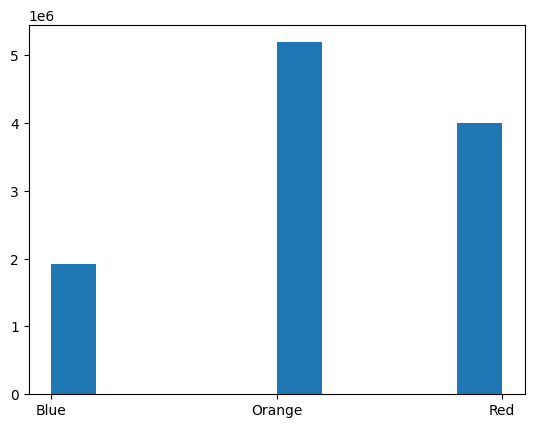

In [109]:
import matplotlib.pyplot as plt

plt.hist(trimmed_df["route_id"])
plt.show()

In [101]:
grouped_by_to_from_stops = trimmed_df.groupby(["from_stop_id", "to_stop_id"])

In [102]:
for name, grouped_df in grouped_by_to_from_stops:
    print(name, grouped_by_to_from_stops.head())
    break

('70001', 70003)          route_id from_stop_id to_stop_id from_stop_departure_datetime  \
0            Blue        70059      70057         2024-01-02T00:13:20Z   
1            Blue        70059      70055         2024-01-02T00:13:20Z   
2            Blue        70059      70053         2024-01-02T00:13:20Z   
3            Blue        70059      70051         2024-01-02T00:13:20Z   
4            Blue        70059      70049         2024-01-02T00:13:20Z   
...           ...          ...        ...                          ...   
10952367      Red        70095      70095         2024-04-29T10:18:08Z   
11031756   Orange        70035      70003         2024-04-30T07:36:45Z   
11031757   Orange        70035      70005         2024-04-30T07:36:45Z   
11031758   Orange        70035      70007         2024-04-30T07:36:45Z   
11031759   Orange        70035      70009         2024-04-30T07:36:45Z   

         to_stop_arrival_datetime  travel_time_sec          datetime_x  temp  \
0            2

In [103]:
grouped_df

,route_id,from_stop_id,to_stop_id,from_stop_departure_datetime,to_stop_arrival_datetime,travel_time_sec,datetime_x,temp,precip,precipprob,preciptype,snow,snowdepth,windspeed,icon,fenway_event,garden_event
1250,Orange,70001,70003,2024-01-02T00:00:21Z,2024-01-02T00:01:41Z,80,2024-01-02 00:00:21,28.0,0.0,0,NaN,0.0,0,9.1,clear-night,False,False
1440,Orange,70001,70003,2024-01-02T00:15:28Z,2024-01-02T00:16:45Z,77,2024-01-02 00:15:28,28.0,0.0,0,NaN,0.0,0,9.1,clear-night,False,False
1630,Orange,70001,70003,2024-01-02T00:30:44Z,2024-01-02T00:32:05Z,81,2024-01-02 00:30:44,28.0,0.0,0,NaN,0.0,0,9.1,clear-night,False,False
4791,Orange,70001,70003,2024-01-01T07:53:26Z,2024-01-01T07:54:48Z,82,2024-01-01 07:53:26,32.0,0.0,0,NaN,0.0,0,5.7,cloudy,False,False
4978,Orange,70001,70003,2024-01-01T07:01:18Z,2024-01-01T07:02:40Z,82,2024-01-01 07:01:18,32.0,0.0,0,NaN,0.0,0,5.7,cloudy,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11112542,Orange,70001,70003,2024-04-30T23:56:23Z,2024-04-30T23:57:39Z,76,2024-04-30 23:56:23,48.0,0.0,0,NaN,0.0,0,15.9,cloudy,False,False
11112579,Orange,70001,70003,2024-04-30T23:01:02Z,2024-04-30T23:02:23Z,81,2024-04-30 23:01:02,48.0,0.0,0,NaN,0.0,0,15.9,cloudy,False,False
11115717,Orange,70001,70003,2024-05-01T00:06:29Z,2024-05-01T00:07:51Z,82,2024-05-01 00:06:29,48.0,0.0,0,NaN,0.0,0,10.2,cloudy,False,False
11115907,Orange,70001,70003,2024-05-01T00:18:25Z,2024-05-01T00:19:46Z,81,2024-05-01 00:18:25,48.0,0.0,0,NaN,0.0,0,10.2,cloudy,False,False


/Users/ncantalupa/opt/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


<AxesSubplot:xlabel='garden_event', ylabel='travel_time_sec'>

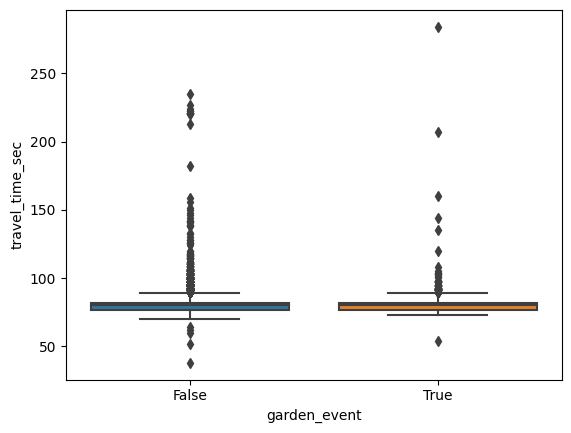

In [117]:
import seaborn as sns

sns.boxplot(x="garden_event", y="travel_time_sec", data=grouped_df)

In [116]:
grouped_df.columns

Index(['route_id', 'from_stop_id', 'to_stop_id',
       'from_stop_departure_datetime', 'to_stop_arrival_datetime',
       'travel_time_sec', 'datetime_x', 'temp', 'precip', 'precipprob',
       'preciptype', 'snow', 'snowdepth', 'windspeed', 'icon', 'fenway_event',
       'garden_event'],
      dtype='object')

In [210]:
grouped_df

,route_id,from_stop_id,to_stop_id,from_stop_departure_datetime,to_stop_arrival_datetime,travel_time_sec,datetime_x,temp,precip,precipprob,preciptype,snow,snowdepth,windspeed,icon,fenway_event,garden_event
1250,Orange,70001,70003,2024-01-02T00:00:21Z,2024-01-02T00:01:41Z,80,2024-01-02 00:00:21,28.0,0.0,0,NaN,0.0,0,9.1,clear-night,False,False
1440,Orange,70001,70003,2024-01-02T00:15:28Z,2024-01-02T00:16:45Z,77,2024-01-02 00:15:28,28.0,0.0,0,NaN,0.0,0,9.1,clear-night,False,False
1630,Orange,70001,70003,2024-01-02T00:30:44Z,2024-01-02T00:32:05Z,81,2024-01-02 00:30:44,28.0,0.0,0,NaN,0.0,0,9.1,clear-night,False,False
4791,Orange,70001,70003,2024-01-01T07:53:26Z,2024-01-01T07:54:48Z,82,2024-01-01 07:53:26,32.0,0.0,0,NaN,0.0,0,5.7,cloudy,False,False
4978,Orange,70001,70003,2024-01-01T07:01:18Z,2024-01-01T07:02:40Z,82,2024-01-01 07:01:18,32.0,0.0,0,NaN,0.0,0,5.7,cloudy,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11112542,Orange,70001,70003,2024-04-30T23:56:23Z,2024-04-30T23:57:39Z,76,2024-04-30 23:56:23,48.0,0.0,0,NaN,0.0,0,15.9,cloudy,False,False
11112579,Orange,70001,70003,2024-04-30T23:01:02Z,2024-04-30T23:02:23Z,81,2024-04-30 23:01:02,48.0,0.0,0,NaN,0.0,0,15.9,cloudy,False,False
11115717,Orange,70001,70003,2024-05-01T00:06:29Z,2024-05-01T00:07:51Z,82,2024-05-01 00:06:29,48.0,0.0,0,NaN,0.0,0,10.2,cloudy,False,False
11115907,Orange,70001,70003,2024-05-01T00:18:25Z,2024-05-01T00:19:46Z,81,2024-05-01 00:18:25,48.0,0.0,0,NaN,0.0,0,10.2,cloudy,False,False


In [274]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [273]:
features = ['hour', 'temp', 'precip', 'snow', 'windspeed', 'fenway_event',
       'garden_event']

In [ ]:
from sklearn.preprocessing import StandardScaler

model_summary = pd.DataFrame(columns=["route",'routes_trained_on', "intercept", 'hour', 'temp', 'precip', 'snow', 'windspeed', 'fenway_event',
       'garden_event', "r_squared", "mse", "rmse"])

counter = 1
for route, grouped_df in grouped_by_to_from_stops:
    print(f"Route {counter}/{len(grouped_by_to_from_stops)}      ", end = "\r")  
    if grouped_df.shape[0] >= 50:
        grouped_df["fenway_event"] = grouped_df["fenway_event"].astype(int)
        grouped_df["garden_event"] = grouped_df["garden_event"].astype(int)
        grouped_df['hour'] = grouped_df['datetime_x'].dt.hour

        X = grouped_df[features]
        y = grouped_df['travel_time_sec']

        scaler = StandardScaler()
        X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)

        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)

        model_summary = model_summary.append({
            'route': route,
            'routes_trained_on': grouped_df.shape[0], 
            'intercept': model.intercept_,
            'hour': model.coef_[0],
            'temp': model.coef_[1],
            'precip': model.coef_[2],
            'snow': model.coef_[3],
            'windspeed': model.coef_[4],
            'fenway_event': model.coef_[5],
            'garden_event': model.coef_[6],
            'r_squared': r2,
            'mse': mse, 
            'rmse': rmse
        }, ignore_index=True)
    counter += 1



In [276]:
X_scaled

,hour,temp,precip,snow,windspeed,fenway_event,garden_event
0,-1.007911,-0.926938,-0.366093,0.0,-1.472420,0.0,-0.627646
1,-0.840331,-0.795996,-0.366093,0.0,-1.215618,0.0,-0.627646
2,-0.170009,0.028940,-0.366093,0.0,-0.295414,0.0,1.593255
3,-0.170009,0.028940,-0.366093,0.0,-0.295414,0.0,1.593255
4,-0.002429,-0.115096,-0.366093,0.0,0.260988,0.0,1.593255
...,...,...,...,...,...,...,...
133,0.667893,0.552709,-0.366093,0.0,-1.194218,0.0,1.593255
134,1.003054,0.526521,-0.366093,0.0,-1.472420,0.0,-0.627646
135,1.170634,0.369390,-0.366093,0.0,-1.472420,0.0,-0.627646
136,-1.510652,0.028940,-0.366093,0.0,-0.017213,0.0,-0.627646


In [279]:
model_summary

,route,routes_trained_on,intercept,hour,temp,precip,snow,windspeed,fenway_event,garden_event,r_squared,mse,rmse
0,"(70001, 70003)",9994,80.761463,-0.440457,-0.881012,0.127002,1.692644e-01,0.399338,0.094706,0.053733,0.022629,66.338954,8.144873
1,"(70001, 70005)",9980,212.959567,-1.292899,-1.774344,-0.255363,1.559614e-01,1.339722,-0.118020,-0.293888,0.023022,332.848182,18.244127
2,"(70001, 70007)",9974,384.826515,-3.850314,-1.664617,-1.019309,2.043168e-01,4.227085,-0.743716,0.568738,-0.002626,3200.655486,56.574336
3,"(70001, 70009)",9641,491.880982,-4.523371,-1.933594,0.227866,4.292881e-01,1.425277,-0.011387,-0.601445,0.003321,6049.127339,77.776136
4,"(70001, 70011)",9639,591.378108,-5.961839,-0.375007,0.132946,4.753304e-01,1.546246,-0.218112,-0.581946,0.011292,2243.875672,47.369565
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,"(Oak Grove-02, 70028)",136,860.933527,-6.159956,-2.742552,-3.937524,3.552714e-15,-8.139515,0.000000,14.887095,0.051730,17655.109999,132.872533
2167,"(Oak Grove-02, 70030)",136,616.583493,-6.637006,-3.722428,-5.171226,4.440892e-15,-10.410663,0.000000,11.813868,0.086681,6556.877355,80.974548
2168,"(Oak Grove-02, 70032)",141,356.451373,-0.711792,-1.930101,1.894836,-3.641532e-14,-7.996015,0.000000,8.381086,-0.062151,12454.689188,111.600579
2169,"(Oak Grove-02, 70034)",143,132.912819,2.473544,1.187894,5.365382,8.881784e-16,-7.317250,0.000000,7.620898,-42.349681,147.335177,12.138170


In [301]:
model_summary.describe()

,intercept,hour,temp,precip,snow,windspeed,fenway_event,garden_event,r_squared,mse,rmse
count,2171.000000,2171.000000,2171.000000,2171.000000,2.171000e+03,2171.000000,2171.000000,2171.000000,2171.000000,2.171000e+03,2171.000000
mean,1243.174503,-17.705222,-6.156666,4.019701,2.617325e+00,-2.212526,0.393050,16.098569,-0.116201,7.419735e+04,197.357786
std,1028.639537,34.627903,58.910081,30.057236,4.281869e+01,27.852812,10.861839,33.098879,4.081426,2.433869e+05,187.785766
min,14.480764,-178.247140,-689.345780,-94.426495,-1.672837e+02,-238.543092,-99.249185,-77.041657,-183.009499,1.649952e+00,1.284505
25%,467.929187,-30.872928,-18.376486,-4.720409,-4.906677e-01,-6.004527,-1.678783,1.308036,-0.003880,6.327839e+03,79.547582
50%,1014.942175,-11.078468,-1.446722,-0.390607,4.440892e-16,0.201952,0.000000,6.655586,0.012050,2.751495e+04,165.876312
75%,1785.354566,-0.781096,6.327178,3.500907,1.129878e+00,6.069561,1.966601,17.188385,0.050490,6.941964e+04,263.476065
max,8507.580523,627.373778,164.263521,250.496059,1.469347e+03,112.875226,42.959210,283.181952,0.584300,6.645018e+06,2577.793303


In [350]:
model_summary[model_summary["r_squared"]> 0.1].describe()

,intercept,hour,temp,precip,snow,windspeed,fenway_event,garden_event,r_squared,mse,rmse
count,335.000000,335.000000,335.000000,335.000000,3.350000e+02,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,1597.091924,-8.669836,7.600234,-4.361197,2.796566e+00,1.143217,-2.047291,16.760830,0.220240,49487.843588,186.118936
std,1237.738158,49.115248,106.856963,24.092143,3.830836e+01,33.903523,15.329059,30.689391,0.098159,58167.649921,122.032943
min,28.689440,-169.781784,-689.345780,-47.448458,-7.864718e+01,-238.543092,-99.249185,-77.041657,0.100540,8.740092,2.956365
25%,638.700262,-25.256411,-63.184337,-22.224402,-3.516467e+00,-10.943657,-3.806432,0.972283,0.149768,5115.993538,71.526120
50%,1456.578477,-8.925908,-1.281896,-4.696005,-5.684342e-14,2.523034,0.000000,6.792803,0.201096,36437.863399,190.887044
75%,2266.164596,1.596572,108.249286,7.651640,7.815970e-14,23.914799,2.677196,20.053889,0.264752,76058.384985,275.786846
max,8507.580523,627.373778,164.263521,144.123631,3.599053e+02,56.602330,29.924841,268.773742,0.584300,498392.539882,705.969220


In [353]:
1 - 1529/2171

0.2957162597881161

In [281]:
stops = pd.read_csv("stops.csv", index_col=0)
stops.loc["70095"]

address                                             NaN
at_street                                           NaN
description            JFK/UMass - Red Line - Braintree
latitude                                      42.320418
location_type                                         0
longitude                                    -71.052287
municipality                                     Boston
name                                          JFK/UMass
on_street                                           NaN
platform_code                                       NaN
platform_name                                 Braintree
vehicle_type                                        1.0
wheelchair_boarding                                   1
Name: 70095, dtype: object

In [282]:
model_summary[model_summary["route"] == ('70026', 70024)]

,route,routes_trained_on,intercept,hour,temp,precip,snow,windspeed,fenway_event,garden_event,r_squared,mse,rmse
506,"(70026, 70024)",13519,56.256307,-0.177426,-3.856618,-0.911074,-0.060334,1.441837,-0.552942,0.984437,0.00389,8357.684727,91.420374


In [283]:
new_route = []
for i, row in model_summary.iterrows():
    route_tuple = row['route']
    new_route.append((str(route_tuple[0]), str(route_tuple[1])))
model_summary['route'] = new_route

In [284]:
model_summary.to_csv("lr_model_results.csv", index=False)

In [311]:
times_mean_std = pd.DataFrame(columns=["route", "routes_trained_on", "mean", "std", "outlier_pct"])

counter = 1
for route, grouped_df in grouped_by_to_from_stops:
    print(f"Route {counter}/{len(grouped_by_to_from_stops)}      ", end = "\r")
    Q1 = grouped_df.travel_time_sec.quantile(0.25)
    Q3 = grouped_df.travel_time_sec.quantile(0.75)
    IQR =  Q3 - Q1
    times_mean_std = times_mean_std.append({
        "route": route,
        "routes_trained_on": grouped_df.shape[0],  
        "mean": grouped_df.travel_time_sec.mean(), 
        "std": grouped_df.travel_time_sec.std(), 
        "outlier_pct": ((grouped_df[(grouped_df['travel_time_sec'] < (Q1 - 1.5 * IQR)) | (grouped_df['travel_time_sec'] > (Q3 + 1.5 * IQR))].shape[0])/grouped_df.shape[0])
    }, ignore_index=True)
    counter += 1

times_mean_std

,route,routes_trained_on,mean,std,outlier_pct
0,"(70001, 70003)",9994,80.803782,8.216537,0.052532
1,"(70001, 70005)",9980,212.833768,27.857095,0.056012
2,"(70001, 70007)",9974,384.803188,50.265281,0.067576
3,"(70001, 70009)",9641,492.255783,53.171447,0.054766
4,"(70001, 70011)",9639,591.123146,58.374686,0.055711
...,...,...,...,...,...
2590,"(Oak Grove-02, 70028)",136,864.375000,77.953161,0.080882
2591,"(Oak Grove-02, 70030)",136,617.257353,62.714875,0.066176
2592,"(Oak Grove-02, 70032)",141,360.297872,59.186237,0.085106
2593,"(Oak Grove-02, 70034)",143,132.818182,52.898739,0.048951


In [343]:
times_mean_std['coef_var'] = times_mean_std['std']/times_mean_std['mean']
times_mean_std

,route,routes_trained_on,mean,std,outlier_pct,coef_var
0,"(70001, 70003)",9994,80.803782,8.216537,0.052532,0.101685
1,"(70001, 70005)",9980,212.833768,27.857095,0.056012,0.130887
2,"(70001, 70007)",9974,384.803188,50.265281,0.067576,0.130626
3,"(70001, 70009)",9641,492.255783,53.171447,0.054766,0.108016
4,"(70001, 70011)",9639,591.123146,58.374686,0.055711,0.098752
...,...,...,...,...,...,...
2590,"(Oak Grove-02, 70028)",136,864.375000,77.953161,0.080882,0.090184
2591,"(Oak Grove-02, 70030)",136,617.257353,62.714875,0.066176,0.101602
2592,"(Oak Grove-02, 70032)",141,360.297872,59.186237,0.085106,0.164270
2593,"(Oak Grove-02, 70034)",143,132.818182,52.898739,0.048951,0.398279


In [344]:
times_mean_std.outlier_pct.mean()

0.05270454102502762

In [347]:
times_mean_std.coef_var.mean()

0.23402357821366718

In [334]:
highest_r_squared = pd.DataFrame(model_summary[model_summary["routes_trained_on"] > 200].sort_values(by="r_squared", ascending=False).head(50))
highest_r_squared

,route,routes_trained_on,intercept,hour,temp,precip,snow,windspeed,fenway_event,garden_event,r_squared,mse,rmse
1478,"(70083, 70097)",434,704.828749,-4.614707,82.556973,-18.719918,-4.407205e+00,-12.548633,12.191413,0.218265,0.565167,10945.111829,104.618888
1670,"(70095, 70097)",439,506.050568,-4.475689,79.819355,-24.726765,-8.926676e-01,-12.917304,13.969137,-1.816653,0.524424,9100.531226,95.396704
1396,"(70079, 70101)",322,1750.942032,-31.132661,164.263521,11.393070,-1.535375e+01,11.998647,7.014421,19.245132,0.502802,25071.233552,158.338983
607,"(70031, 70279)",1170,63.810366,1.595658,-13.233964,-3.290879,7.642142e-01,-1.164820,0.743731,1.793840,0.498636,217.261065,14.739778
1671,"(70095, 70099)",436,645.350239,-4.234300,86.525494,-24.340938,-7.215812e-01,-12.166759,12.313200,1.562161,0.474613,10920.628937,104.501813
118,"(70006, 70002)",553,188.463603,2.127987,-0.977014,14.188448,-1.776357e-15,11.442781,0.000000,-1.199317,0.468383,746.388944,27.320120
1354,"(70077, 70101)",322,1806.513230,-32.338142,157.952011,15.472464,-1.553430e+01,18.385793,7.963131,18.613465,0.466406,25807.501357,160.647133
1394,"(70079, 70097)",324,1357.344741,-23.113784,118.666815,13.726278,-1.314229e+01,11.755045,7.482368,8.834857,0.455604,17232.099455,131.271091
1300,"(70075, 70077)",1147,28.689440,1.019589,-5.391520,-0.925803,1.038557e+00,1.945013,1.467674,-0.788071,0.437557,65.633684,8.101462
1312,"(70075, 70101)",321,1920.800953,-31.568229,147.464628,21.007275,-1.467773e+01,29.131612,7.537344,19.880571,0.436846,28026.406423,167.410891


In [335]:
from_stop = []
to_stop = []
for i, row in highest_r_squared.iterrows():
    from_stop.append(stop_names[row["route"][0]])
    to_stop.append(stop_names[row["route"][1]])
highest_r_squared["from_stop"] = from_stop
highest_r_squared["to_stop"] = to_stop
highest_r_squared

,route,routes_trained_on,intercept,hour,temp,precip,snow,windspeed,fenway_event,garden_event,r_squared,mse,rmse,from_stop,to_stop
1478,"(70083, 70097)",434,704.828749,-4.614707,82.556973,-18.719918,-4.407205e+00,-12.548633,12.191413,0.218265,0.565167,10945.111829,104.618888,Andrew - Red,North Quincy - Red
1670,"(70095, 70097)",439,506.050568,-4.475689,79.819355,-24.726765,-8.926676e-01,-12.917304,13.969137,-1.816653,0.524424,9100.531226,95.396704,JFK/UMass - Red,North Quincy - Red
1396,"(70079, 70101)",322,1750.942032,-31.132661,164.263521,11.393070,-1.535375e+01,11.998647,7.014421,19.245132,0.502802,25071.233552,158.338983,South Station - Red,Quincy Center - Red
607,"(70031, 70279)",1170,63.810366,1.595658,-13.233964,-3.290879,7.642142e-01,-1.164820,0.743731,1.793840,0.498636,217.261065,14.739778,Sullivan Square - Orange,Assembly - Orange
1671,"(70095, 70099)",436,645.350239,-4.234300,86.525494,-24.340938,-7.215812e-01,-12.166759,12.313200,1.562161,0.474613,10920.628937,104.501813,JFK/UMass - Red,Wollaston - Red
118,"(70006, 70002)",553,188.463603,2.127987,-0.977014,14.188448,-1.776357e-15,11.442781,0.000000,-1.199317,0.468383,746.388944,27.320120,Jackson Square - Orange,Green Street - Orange
1354,"(70077, 70101)",322,1806.513230,-32.338142,157.952011,15.472464,-1.553430e+01,18.385793,7.963131,18.613465,0.466406,25807.501357,160.647133,Downtown Crossing - Red,Quincy Center - Red
1394,"(70079, 70097)",324,1357.344741,-23.113784,118.666815,13.726278,-1.314229e+01,11.755045,7.482368,8.834857,0.455604,17232.099455,131.271091,South Station - Red,North Quincy - Red
1300,"(70075, 70077)",1147,28.689440,1.019589,-5.391520,-0.925803,1.038557e+00,1.945013,1.467674,-0.788071,0.437557,65.633684,8.101462,Park Street - Red,Downtown Crossing - Red
1312,"(70075, 70101)",321,1920.800953,-31.568229,147.464628,21.007275,-1.467773e+01,29.131612,7.537344,19.880571,0.436846,28026.406423,167.410891,Park Street - Red,Quincy Center - Red


In [336]:
highest_r_squared.to_csv("best_model_results.csv", index=False)